#### Competition Description

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2 as cv

from sklearn.metrics import mean_squared_error
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Note: The first column called "label" is the number drawn by the user. The rest of the columns represents the pixel values of the associated image.

## EDA

### Data Exploration
###### Examining the dataset to understand its structure, size, and the types of variables it contains.

To display the n rows pf a pandas DataFrame we are using df.head(), for the first n rows, df.tail() for the last n rows and df sample(), for randomly selected n rows


In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29640,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.isnull().sum().sort_values(ascending=False) 
#is a method to check for and Count the number of missing or null values in the DataFrame

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

-> As we can see from above, there are no missing values.

In [6]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


-> Datatype of all the columns are integer(int).

### Data visualization
###### Creating visual representations of the data to help identify patterns, trends, and outliers.

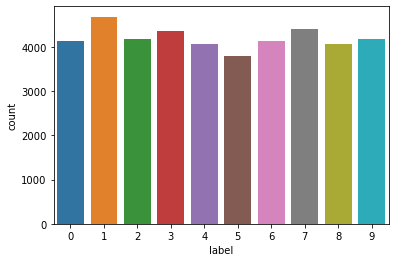

In [11]:
sns.countplot(df_train.label); #Counts the number of images for each digit

### Data preprocessing
###### Transforming the data to make it suitable for modeling. This can include normalizing, scaling, or encoding categorical variables.

Defining of x_train, y_train, x_test

In [8]:
x_train=(df_train.iloc[:,1:].values).astype(float) #Picking the pixels and converting to type float. 
y_train=(df_train.iloc[:,0].values).astype(int) #Picking the labels and converting to type integer.
x_test=df_test.values.astype(float) #Test file contains only pixels thats why we converted to type float.

Reshaping 

In [9]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

Normalizing

##### Why should we Normalize image pixel values or divide by 255?
We have explored a simple image and its pixel values.
The pixel values can range from 0 to 256. Each number represents a color code.
When using the image as it is and passing through a Deep Neural Network, the computation of high numeric values may become more complex.
To reduce this we can normalize the values to range from 0 to 1.

In this way, the numbers will be small and the computation becomes easier and faster.
As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

In [10]:
x_train /= 255  # x_train = x_train / 255
x_test /= 255

In [11]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

### Data modeling
###### Creating models to make predictions or classify the data.

Creating a CNN model

In [12]:
def build_model():
    model= keras.Sequential([
        Conv2D(32,(3,3),padding='same'),
        Activation('relu'),
        Conv2D(32, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same'),
        Activation('relu'),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(512),
        Activation('relu'),
        Dropout(0.5),
        Dense(10),
        Activation('softmax'),
     
    ])
    
    metrics_list = [
        tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
    ]

    sparse_cat_crossentropy = tf.losses.SparseCategoricalCrossentropy(from_logits=False)

    model.compile(optimizer = 'adam', loss = sparse_cat_crossentropy, metrics = metrics_list)
    
    
    
    #model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
    return model

In [13]:
x_train.shape,y_train.shape

((33600, 28, 28, 1), (33600,))

In [14]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(x_train, y_train, epochs=10, verbose=1, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/10
945/945 [==============================] - 54s 56ms/step - loss: 0.2142 - accuracy: 0.9309 - val_loss: 0.0594 - val_accuracy: 0.9812
Epoch 2/10
945/945 [==============================] - 52s 55ms/step - loss: 0.0755 - accuracy: 0.9767 - val_loss: 0.0427 - val_accuracy: 0.9890
Epoch 3/10
945/945 [==============================] - 54s 57ms/step - loss: 0.0574 - accuracy: 0.9820 - val_loss: 0.0334 - val_accuracy: 0.9905
Epoch 4/10
945/945 [==============================] - 53s 56ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 5/10
945/945 [==============================] - 53s 57ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 6/10
945/945 [==============================] - 54s 58ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0287 - val_accuracy: 0.9914
Epoch 7/10
945/945 [==============================] - 52s 55ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0266 - val_accuracy:

In [26]:
score=model.evaluate(x_val,y_val)

263/263 [==============================] - 3s 11ms/step - loss: 0.0255 - accuracy: 0.9915


Regarding my score result, the accuracy score is %99.15, and the loss score is %0.25

In [30]:
Prediction=model.predict(x_test)
predicted_classes=np.argmax(Prediction,axis=1)
submissions=pd.DataFrame({"ImageId":list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submission.csv", index=False, header=True)


875/875 [==============================] - 10s 12ms/step
